# STEP1 : import packages

In [2]:
import pandas as pd
import pandas.plotting
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import scipy.stats as stats
import math

# STEP2 : download data

In [3]:
#原始資料 #觀賞用
def readdata():
    data = pd.read_csv(input("請輸入資料來源路徑（不要加引號）:"),encoding = "ISO-8859-1")
    return data

In [4]:
#/Users/changhungchao/Desktop/python/DS_final/BRAZIL_CITIES.csv
data = readdata()

請輸入資料來源路徑（不要加引號）:/Users/changhungchao/Desktop/python/DS_final/BRAZIL_CITIES.csv


In [5]:
data

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,So Paulo,SP,1,11253503.0,11133776.0,119727.0,3576148.0,3548433.0,27715.0,10463636.0,...,8.0,1.947080e+13,2.893260e+12,5740995.0,1134570.0,3236.0,1.0,130.0,7.0,225.0
1,Osasco,SP,0,666740.0,664447.0,2293.0,202009.0,202009.0,NaN,616068.0,...,2.0,6.732330e+12,1.321699e+10,283641.0,73477.0,174.0,NaN,7.0,1.0,10.0
2,Rio De Janeiro,RJ,1,6320446.0,6264915.0,55531.0,2147235.0,2147235.0,NaN,5426838.0,...,5.0,2.283450e+12,9.738860e+11,2039930.0,363486.0,289.0,1.0,68.0,1.0,120.0
3,Braslia,DF,1,2570160.0,2564370.0,5790.0,774820.0,751558.0,23261.0,2450634.0,...,4.0,2.920930e+11,8.016160e+12,1288107.0,211392.0,594.0,1.0,28.0,1.0,60.0
4,Porto Alegre,RS,1,1409351.0,1403450.0,5901.0,508503.0,508503.0,NaN,1339712.0,...,3.0,2.709620e+11,4.027000e+11,608777.0,106829.0,1383.0,1.0,19.0,12.0,53.0
5,Belo Horizonte,MG,1,2375151.0,2369063.0,6088.0,762924.0,762924.0,NaN,2263631.0,...,3.0,1.375720e+11,7.724250e+11,1439055.0,248456.0,286.0,1.0,21.0,2.0,67.0
6,Barueri,SP,0,240749.0,239837.0,912.0,71821.0,71821.0,NaN,235508.0,...,2.0,8.421945e+10,6.677656e+09,110360.0,27564.0,99.0,NaN,7.0,1.0,7.0
7,Recife,PE,1,1537704.0,1535289.0,2415.0,471252.0,471252.0,NaN,1157593.0,...,3.0,8.117385e+10,1.035500e+11,396064.0,160433.0,229.0,1.0,10.0,14.0,33.0
8,Santos,SP,0,419400.0,412455.0,6945.0,144654.0,144555.0,99.0,399390.0,...,2.0,7.475725e+10,1.520745e+10,143615.0,75930.0,904.0,1.0,5.0,NaN,13.0
9,Curitiba,PR,1,1751907.0,1743036.0,8871.0,576347.0,576347.0,NaN,1688975.0,...,3.0,7.313852e+10,2.170070e+11,1062063.0,173795.0,467.0,1.0,20.0,16.0,54.0


# STEP3-1 : 視覺化/合併特定column

## 1.針對STATE/Capital

STATE的各個個數有:
MG    853
SP    646
RS    498
BA    418
PR    400
SC    295
GO    246
PI    224
PB    223
MA    217
PE    186
CE    184
RN    167
PA    144
MT    141
TO    139
AL    102
RJ     93
MS     79
ES     78
SE     75
AM     62
RO     52
AC     22
AP     16
RR     15
DF      1
Name: STATE, dtype: int64

capital的各個個數有:
0    5549
1      27
Name: CAPITAL, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5,1,'CAPITAL')

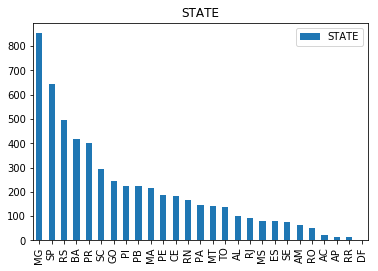

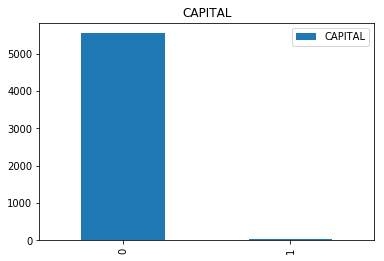

In [6]:
print("STATE的各個個數有:")
print(data["STATE"].value_counts())
data["STATE"].value_counts().to_frame().plot(kind="bar")
plt.title("STATE")
print()
print("capital的各個個數有:")
print(data["CAPITAL"].value_counts())
print(data["CAPITAL"].value_counts().to_frame().plot(kind="bar"))
plt.title("CAPITAL")

### 因此，我們最後就把這兩個變數轉換成dummy variables

## 2.針對population相關變數## 

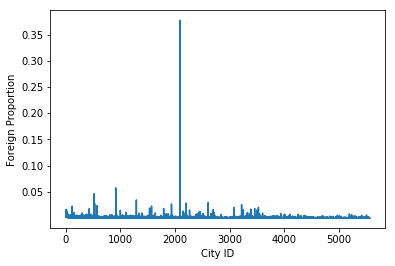

In [7]:
#看一下外國人佔的比例
output_popula_propo = [] #愈輸出的column
for i in range(len(data)):
    #print('{:.2%}'.format(data["IBGE_RES_POP_ESTR"][i]/data["IBGE_RES_POP"][i]))
    output_popula_propo.append(data["IBGE_RES_POP_ESTR"][i]/data["IBGE_RES_POP"][i])
#     if(data["IBGE_RES_POP_ESTR"][i]/data["IBGE_RES_POP"][i]>0.3):
#         print(i)
plt.plot(output_popula_propo)
plt.xlabel("City ID")
plt.ylabel("Foreign Proportion")
plt.yticks(np.arange(0.05,0.4,0.05))
plt.show()         

### 刪除地方人口數和外國人口數，留總人口和外國人口比例

## 3.針對domestic Units相關變數

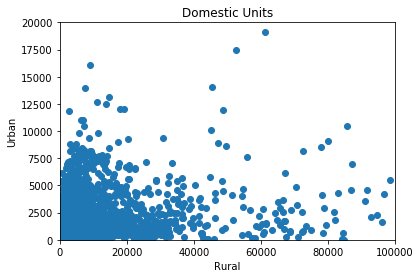

In [8]:
output_dome_propo = [] #愈輸出的column
rural =[]
urban= []
for i in range(len(data)):
    #print('{:.2%}'.format(data["IBGE_DU_RURAL"][i]/data["IBGE_DU"][i]))
    rural.append(data["IBGE_DU_RURAL"][i])
    urban.append(data["IBGE_DU"][i]-data["IBGE_DU_RURAL"][i])
    output_dome_propo.append(data["IBGE_DU_RURAL"][i]/data["IBGE_DU"][i])
#print(minus_output_dome_propo)
plt.scatter(urban,rural)
plt.xlim(0,100000)
plt.ylim(0,20000)
plt.xlabel("Rural")
plt.ylabel("Urban")
plt.title("Domestic Units")
plt.show()

### 保留IBGE_DU，新增位置比例，刪除IBGE_DU_RURAL 和 IBGE_DU

## 4.針對年齡類的變數

,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+
IBGE_1,1.000000,0.999845,0.999546,0.998860,0.994209,0.959993
IBGE_1-4,0.999845,1.000000,0.999806,0.999218,0.994480,0.960543
IBGE_5-9,0.999546,0.999806,1.000000,0.999667,0.995372,0.963627
IBGE_10-14,0.998860,0.999218,0.999667,1.000000,0.996467,0.967550
IBGE_15-59,0.994209,0.994480,0.995372,0.996467,1.000000,0.981560
IBGE_60+,0.959993,0.960543,0.963627,0.967550,0.981560,1.000000


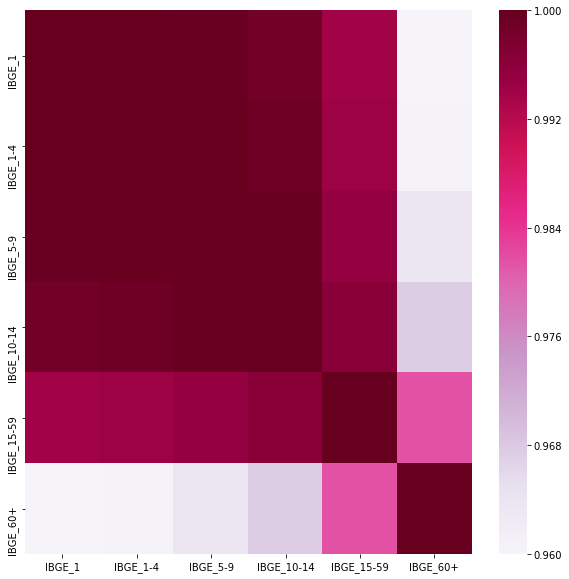

In [9]:
#看變數之間的相關性
plt.figure(figsize=(10,10))
sns.heatmap(data.iloc[:,10:16].corr(),cmap='PuRd')
data.iloc[:,10:16].corr()

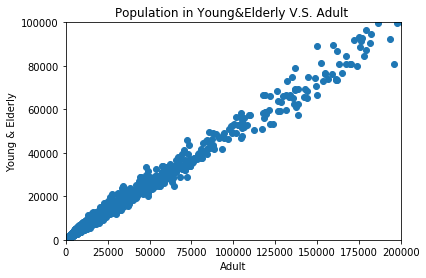

In [11]:
output_year= []
work = []
nowork = []
for i in range(len(data)):
    count = (data["IBGE_1"][i]+data["IBGE_1-4"][i]+data["IBGE_5-9"][i]++data["IBGE_10-14"][i]+data["IBGE_60+"][i])/data["IBGE_15-59"][i]
    output_year.append(count)
    work.append(data["IBGE_15-59"][i])
    nowork.append(data["IBGE_1"][i]+data["IBGE_1-4"][i]+data["IBGE_5-9"][i]++data["IBGE_10-14"][i]+data["IBGE_60+"][i])
    
    #print('{:.2%}'.format(count))
plt.scatter(work,nowork)
plt.ylabel("Young & Elderly")
plt.xlabel("Adult")
plt.title("Population in Young&Elderly V.S. Adult ")
plt.xlim(0,200000)
plt.ylim(0,100000)
plt.show()

### 把整個這一類的變數變成 「負擔人口比例」

## 4.針對GVA等變數

,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP
GVA_AGROPEC,1.000000,0.061179,0.037921,0.054766,0.063312,0.041637,0.055326,0.063766
GVA_INDUSTRY,0.061179,1.000000,0.846567,0.754390,0.863779,0.763963,0.866398,0.890557
GVA_SERVICES,0.037921,0.846567,1.000000,0.850803,0.972949,0.916871,0.974542,0.940343
GVA_PUBLIC,0.054766,0.754390,0.850803,1.000000,0.786988,0.848335,0.789491,0.859895
GVA_TOTAL,0.063312,0.863779,0.972949,0.786988,1.000000,0.908394,0.983619,0.937961
TAXES,0.041637,0.763963,0.916871,0.848335,0.908394,1.000000,0.895967,0.833207
GDP,0.055326,0.866398,0.974542,0.789491,0.983619,0.895967,1.000000,0.943169
POP_GDP,0.063766,0.890557,0.940343,0.859895,0.937961,0.833207,0.943169,1.000000


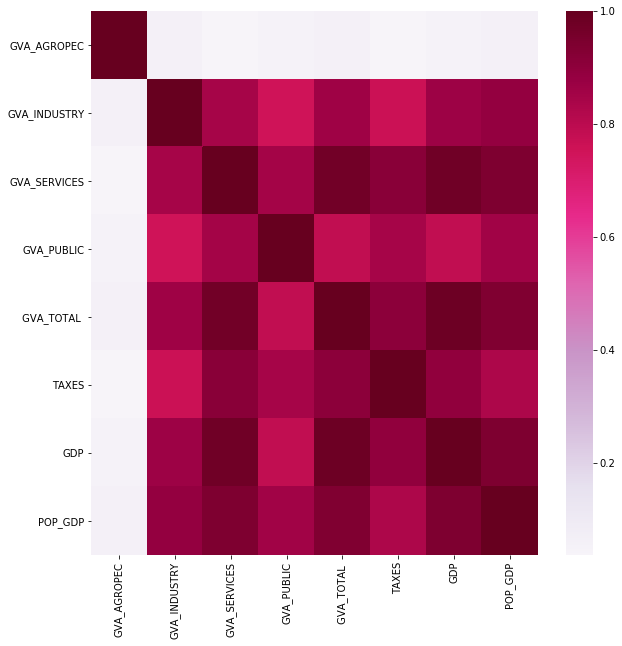

In [630]:
plt.figure(figsize=(10,10))
sns.heatmap(data.iloc[:,33:41].corr(),cmap='PuRd')
data.iloc[:,33:41].corr()

### 刪除GDP GVA_TOTA 兩變數

## 5.針對company變數

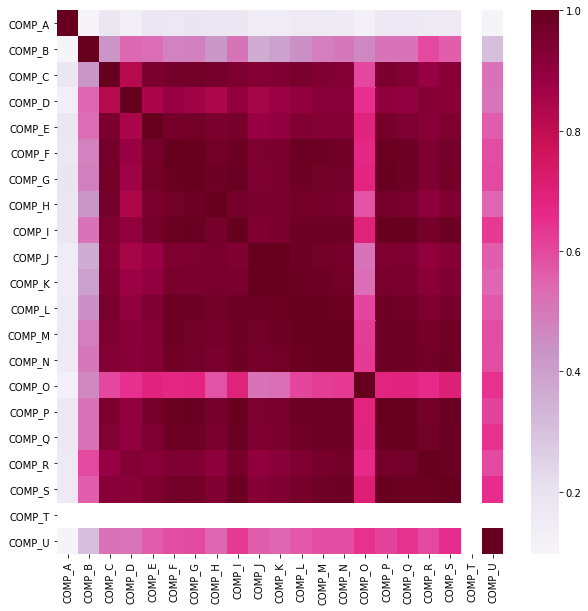

In [631]:
plt.figure(figsize=(10,10))
sns.heatmap(data.iloc[:,45:66].corr(),cmap='PuRd')

In [632]:
output_comp_other = []
for i in range(len(data)):
    summ = sum(data.iloc[i,47:59])
    summ2 = sum(data.iloc[i,60:64])
    output_comp_other.append(summ+summ2)

### 因此很多變數其實有高度相關，我們將變數分成 A B O U和其他 ，刪除COMP_TOT

## 6.針對hotel

In [633]:
plt.figure(figsize=(10,10))
data.iloc[:,66:68].corr()

,HOTELS,BEDS
HOTELS,1.000000,0.811541
BEDS,0.811541,1.000000


<Figure size 720x720 with 0 Axes>

### 相關性還好，先保留

## 7.針對bank變數

In [634]:
plt.figure(figsize=(10,10))
data.iloc[:,68:74].corr()

,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets
Pr_Agencies,1.000000,0.940613,0.849295,0.181776,0.862949,0.429779
Pu_Agencies,0.940613,1.000000,0.849663,0.266319,0.762810,0.635854
Pr_Bank,0.849295,0.849663,1.000000,0.321686,0.679169,0.397434
Pu_Bank,0.181776,0.266319,0.321686,1.000000,0.121038,0.105524
Pr_Assets,0.862949,0.762810,0.679169,0.121038,1.000000,0.339138
Pu_Assets,0.429779,0.635854,0.397434,0.105524,0.339138,1.000000


<Figure size 720x720 with 0 Axes>

### 還好，可以先保留

## 8. 針對交通工具

In [635]:
plt.figure(figsize=(10,10))
data.iloc[:,74:77].corr()

,Cars,Motorcycles,Wheeled_tractor
Cars,1.000000,0.921398,0.854117
Motorcycles,0.921398,1.000000,0.773847
Wheeled_tractor,0.854117,0.773847,1.000000


<Figure size 720x720 with 0 Axes>

### 還好，可以先保留

## 9.中間還有一些變數

Text(0.5,1,'CAPITAL')

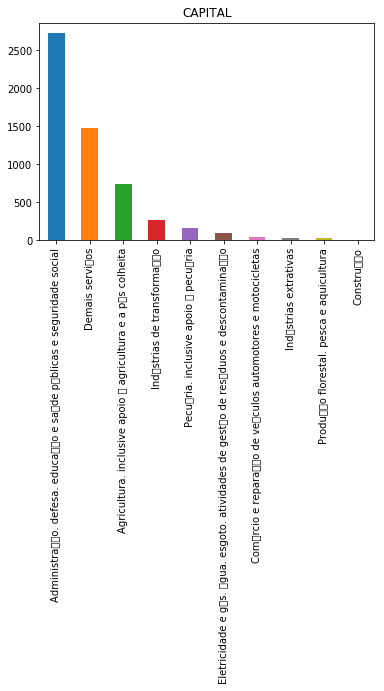

In [636]:
data["GVA_MAIN"].value_counts()
data["GVA_MAIN"].value_counts().plot(kind="bar")
plt.title("CAPITAL")

## 10.剩下的

In [637]:
plt.figure(figsize=(10,10))
data.iloc[:,78:].corr()

,MAC,WAL-MART,POST_OFFICES
MAC,1.000000,0.242251,0.956127
WAL-MART,0.242251,1.000000,0.361784
POST_OFFICES,0.956127,0.361784,1.000000


<Figure size 720x720 with 0 Axes>

### 還好，可以先保留

# STEP3-2：刪除/增加變數在DATA中

In [712]:
#/Users/changhungchao/Desktop/python/DS_final/BRAZIL_CITIES.csv
dataoutput =readdata()

請輸入資料來源:/Users/changhungchao/Desktop/python/DS_final/BRAZIL_CITIES.csv


In [713]:
def see_column():
    for i in dataoutput.columns:
        print(i)

## 0.修改y-label

In [714]:
def setYLabel():
    if("IDHM_y" not in list(dataoutput.columns)):
        list_y =[]
        for i in range(len(dataoutput["IDHM"])):
            if dataoutput["IDHM"][i]>=0.8: 
                list_y.append(3)
            elif dataoutput["IDHM"][i]>=0.7: 
                list_y.append(2)
            elif dataoutput["IDHM"][i] >=0.555: 
                list_y.append(1)
            else:
                list_y.append(0)
        dataoutput.insert(0,"IDHM_y",list_y,True)


In [715]:
setYLabel()
#dataoutput["IDHM_y"][0:5]

## 1.Add some dummy variables

In [716]:
#要先處理特定有nan值的feature變數
#add
dummy_fields = ["STATE","CATEGORIA_TUR","RURAL_URBAN","UBER","GVA_MAIN"]
for i in dummy_fields:
    a = (dataoutput.columns.get_loc(i))
    dummies = pd.get_dummies(dataoutput.iloc[:,a],prefix=i)
    dataoutput= pd.concat([dataoutput,dummies],axis=1)


In [717]:
# for i in dataoutput.columns:
#     print(i)

In [718]:
#delete original object variables
for i in dummy_fields:
    dataoutput = dataoutput.drop(i,axis=1)
#data = data.drop(dummy_fields,axis=1)

In [719]:
for i in dataoutput.columns:
    print(i)

IDHM_y
CITY
CAPITAL
IBGE_RES_POP
IBGE_RES_POP_BRAS
IBGE_RES_POP_ESTR
IBGE_DU
IBGE_DU_URBAN
IBGE_DU_RURAL
IBGE_POP
IBGE_1
IBGE_1-4
IBGE_5-9
IBGE_10-14
IBGE_15-59
IBGE_60+
IBGE_PLANTED_AREA
IBGE_CROP_PRODUCTION_$
IDHM Ranking 2010
IDHM
IDHM_Renda
IDHM_Longevidade
IDHM_Educacao
LONG
LAT
ALT
PAY_TV
FIXED_PHONES
AREA
REGIAO_TUR
ESTIMATED_POP
GVA_AGROPEC
GVA_INDUSTRY
GVA_SERVICES
GVA_PUBLIC
 GVA_TOTAL 
TAXES
GDP
POP_GDP
GDP_CAPITA
MUN_EXPENDIT
COMP_TOT
COMP_A
COMP_B
COMP_C
COMP_D
COMP_E
COMP_F
COMP_G
COMP_H
COMP_I
COMP_J
COMP_K
COMP_L
COMP_M
COMP_N
COMP_O
COMP_P
COMP_Q
COMP_R
COMP_S
COMP_T
COMP_U
HOTELS
BEDS
Pr_Agencies
Pu_Agencies
Pr_Bank
Pu_Bank
Pr_Assets
Pu_Assets
Cars
Motorcycles
Wheeled_tractor
MAC
WAL-MART
POST_OFFICES
STATE_AC
STATE_AL
STATE_AM
STATE_AP
STATE_BA
STATE_CE
STATE_DF
STATE_ES
STATE_GO
STATE_MA
STATE_MG
STATE_MS
STATE_MT
STATE_PA
STATE_PB
STATE_PE
STATE_PI
STATE_PR
STATE_RJ
STATE_RN
STATE_RO
STATE_RR
STATE_RS
STATE_SC
STATE_SE
STATE_SP
STATE_TO
CATEGORIA_TUR_A
CATEGORIA_TU

## 2. Add/delete some float/other variables

In [720]:
#delete city
dataoutput = dataoutput.drop("CITY",axis=1)


In [721]:
#dataoutput

In [722]:
#新增外國人口比例和刪減本國人口總數和外國人口總數
#dataoutput.insert(0,"IDHM_y",list_y,True)
dataoutput.insert(3,"IBGE_RES_Forpop",output_popula_propo,True)
dataoutput = dataoutput.drop(["IBGE_RES_POP_BRAS"],axis=1)
dataoutput = dataoutput.drop(["IBGE_RES_POP_ESTR"],axis=1)

In [723]:
#dataoutput

In [724]:
#保留IBGE_DU，新增位置比例，刪除IBGE_DU_RURAL 和 IBGE_DU_URBAN
dataoutput.insert(4,"IBGE_DU_Pro",output_dome_propo,True)
dataoutput = dataoutput.drop(["IBGE_DU_RURAL"],axis=1)
dataoutput = dataoutput.drop(["IBGE_DU_URBAN"],axis=1)

In [725]:
#dataoutput

In [726]:
#把整個這一類的變數變成 「負擔人口比例」
dataoutput.insert(6,"Pop_burden_ratio",output_year,True)
lis = ["IBGE_1","IBGE_1-4","IBGE_5-9","IBGE_10-14","IBGE_15-59","IBGE_60+"]
dataoutput = dataoutput.drop(lis,axis=1)

In [727]:
#dataoutput

In [728]:
#delete IDHM 相關變數
olist = ["IDHM_Renda","IDHM_Longevidade","IDHM_Educacao","IDHM Ranking 2010","IDHM"]
dataoutput = dataoutput.drop(olist,axis=1)

In [729]:
#see_column()

In [730]:
#刪除GDP,GVA_TOTAL變數
dataoutput = dataoutput.drop(["GDP"],axis=1)
dataoutput = dataoutput.drop([" GVA_TOTAL "],axis=1)

In [731]:
#see_column()

In [732]:
#留下 A B O U和其他 ，刪除COMP_TOT
xlist = dataoutput.columns[29:41].tolist()
for i in range(42,47):
    xlist.append(dataoutput.columns[i])
xlist.append(dataoutput.columns[26])
dataoutput = dataoutput.drop(xlist,axis=1)

In [733]:
dataoutput.insert(30,"COMP_Others",output_comp_other,True)
see_column()

IDHM_y
CAPITAL
IBGE_RES_POP
IBGE_RES_Forpop
IBGE_DU_Pro
IBGE_DU
Pop_burden_ratio
IBGE_POP
IBGE_PLANTED_AREA
IBGE_CROP_PRODUCTION_$
LONG
LAT
ALT
PAY_TV
FIXED_PHONES
AREA
REGIAO_TUR
ESTIMATED_POP
GVA_AGROPEC
GVA_INDUSTRY
GVA_SERVICES
GVA_PUBLIC
TAXES
POP_GDP
GDP_CAPITA
MUN_EXPENDIT
COMP_A
COMP_B
COMP_O
COMP_U
COMP_Others
HOTELS
BEDS
Pr_Agencies
Pu_Agencies
Pr_Bank
Pu_Bank
Pr_Assets
Pu_Assets
Cars
Motorcycles
Wheeled_tractor
MAC
WAL-MART
POST_OFFICES
STATE_AC
STATE_AL
STATE_AM
STATE_AP
STATE_BA
STATE_CE
STATE_DF
STATE_ES
STATE_GO
STATE_MA
STATE_MG
STATE_MS
STATE_MT
STATE_PA
STATE_PB
STATE_PE
STATE_PI
STATE_PR
STATE_RJ
STATE_RN
STATE_RO
STATE_RR
STATE_RS
STATE_SC
STATE_SE
STATE_SP
STATE_TO
CATEGORIA_TUR_A
CATEGORIA_TUR_B
CATEGORIA_TUR_C
CATEGORIA_TUR_D
CATEGORIA_TUR_E
RURAL_URBAN_Intermedirio Adjacente
RURAL_URBAN_Intermedirio Remoto
RURAL_URBAN_Rural Adjacente
RURAL_URBAN_Rural Remoto
RURAL_URBAN_Sem classificao
RURAL_URBAN_Urbano
UBER_1.0
GVA_MAIN_Administrao. defesa. educao e sa

## 3. 填補NaN值

In [734]:
def seeNan():
    #先看每一個col有哪些缺失值
    print("有缺失值的column:")
    for x in range(len(dataoutput.columns)):
        s = []
        for y in range(len(dataoutput)):
            if pd.isna(dataoutput.iloc[y,x]):
                s.append(y)
        print("在",dataoutput.columns[x],"有缺失值",s)
        #for y in len(x):

In [735]:
#seeNan()

#### 有些row好像缺很多缺失值，因此我想說到時候就把那些row都刪掉了

#### 因為IDHM缺失+經緯度缺失無法用平均的去算，也把那兩個刪掉

In [736]:
for i in [2938, 3357, 3446, 4063, 4544, 5573, 5574, 5575,3367,4203]:
    dataoutput = dataoutput.drop(i,axis=0)

In [737]:
#seeNan()

In [738]:
#再補一些平均值當作缺失值上去
fillinindex = ["IBGE_DU","IBGE_DU_Pro","Pr_Assets","Pu_Assets","Cars","Motorcycles","Wheeled_tractor","MUN_EXPENDIT"]
for a in fillinindex:
    dataoutput[a].fillna(dataoutput[a].mean(),inplace = True)

In [739]:
#seeNan()

In [740]:
#忘記刪掉
dataoutput = dataoutput.drop("REGIAO_TUR",axis=1)

In [741]:
#see_column()

#### 剩下的補零

In [742]:
fillinindex = ["HOTELS","BEDS","Pr_Agencies","Pu_Agencies","Pr_Bank","Pu_Bank","MAC","WAL-MART","POST_OFFICES"]
for a in fillinindex:
    dataoutput[a].fillna(0,inplace = True)

In [743]:
seeNan()

有缺失值的column:
在 IDHM_y 有缺失值 []
在 CAPITAL 有缺失值 []
在 IBGE_RES_POP 有缺失值 []
在 IBGE_RES_Forpop 有缺失值 []
在 IBGE_DU_Pro 有缺失值 []
在 IBGE_DU 有缺失值 []
在 Pop_burden_ratio 有缺失值 []
在 IBGE_POP 有缺失值 []
在 IBGE_PLANTED_AREA 有缺失值 []
在 IBGE_CROP_PRODUCTION_$ 有缺失值 []
在 LONG 有缺失值 []
在 LAT 有缺失值 []
在 ALT 有缺失值 []
在 PAY_TV 有缺失值 []
在 FIXED_PHONES 有缺失值 []
在 AREA 有缺失值 []
在 ESTIMATED_POP 有缺失值 []
在 GVA_AGROPEC 有缺失值 []
在 GVA_INDUSTRY 有缺失值 []
在 GVA_SERVICES 有缺失值 []
在 GVA_PUBLIC 有缺失值 []
在 TAXES 有缺失值 []
在 POP_GDP 有缺失值 []
在 GDP_CAPITA 有缺失值 []
在 MUN_EXPENDIT 有缺失值 []
在 COMP_A 有缺失值 []
在 COMP_B 有缺失值 []
在 COMP_O 有缺失值 []
在 COMP_U 有缺失值 []
在 COMP_Others 有缺失值 []
在 HOTELS 有缺失值 []
在 BEDS 有缺失值 []
在 Pr_Agencies 有缺失值 []
在 Pu_Agencies 有缺失值 []
在 Pr_Bank 有缺失值 []
在 Pu_Bank 有缺失值 []
在 Pr_Assets 有缺失值 []
在 Pu_Assets 有缺失值 []
在 Cars 有缺失值 []
在 Motorcycles 有缺失值 []
在 Wheeled_tractor 有缺失值 []
在 MAC 有缺失值 []
在 WAL-MART 有缺失值 []
在 POST_OFFICES 有缺失值 []
在 STATE_AC 有缺失值 []
在 STATE_AL 有缺失值 []
在 STATE_AM 有缺失值 []
在 STATE_AP 有缺失值 []
在 STATE_BA 有缺失值 []
在 STATE_CE 

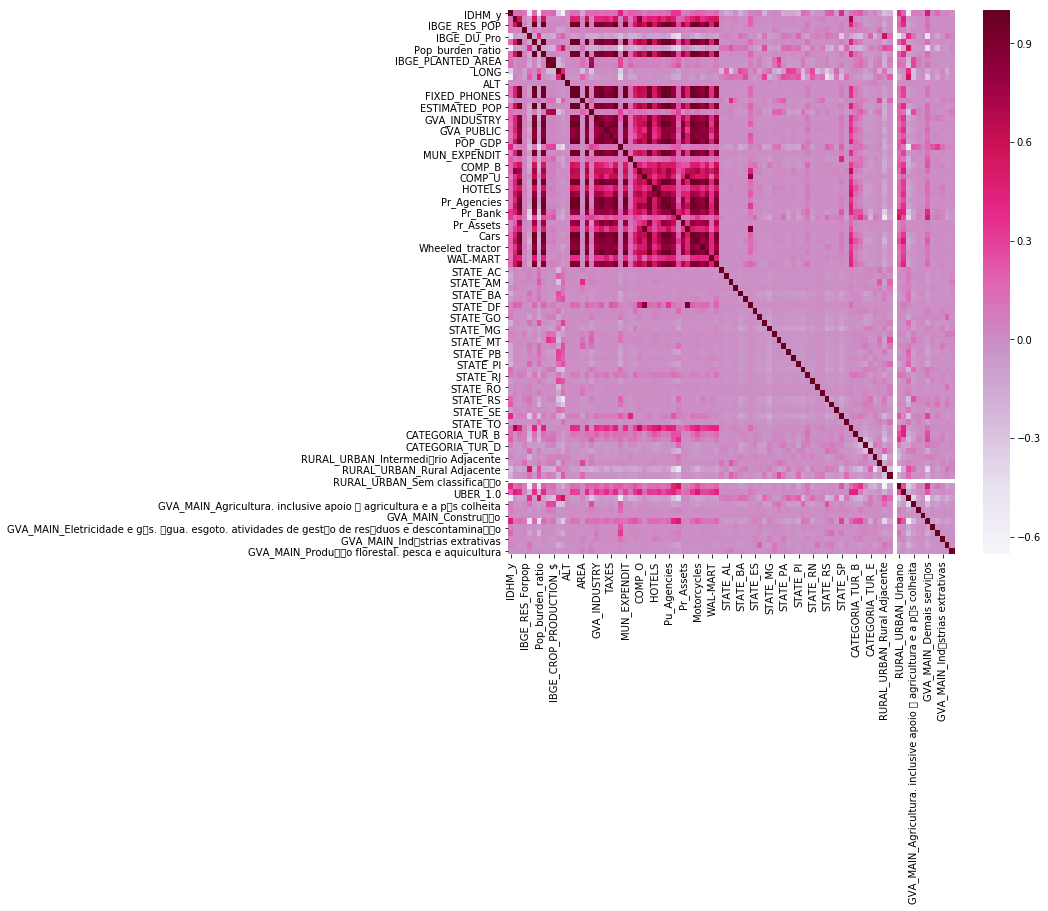

In [744]:
plt.figure(figsize=(10,10))
sns.heatmap(dataoutput.corr(),cmap='PuRd')

# STEP4：輸出資料

In [745]:
def outputloadingData():
    dataoutput.to_csv(input("請輸入輸出路徑+檔名:"),index = None,header = True)


In [746]:
#/Users/changhungchao/Desktop/python/DS_final/output.csv
outputloadingData()

請輸入輸出路徑+檔名:/Users/changhungchao/Desktop/python/DS_final/output.csv
